# A SF Permits Cleaning
4 points

- Download the Building_Permits.csv from Kaggle
- Clean the San Francisco Building permit dataset
- Use imputation were necessary

In [1]:
import numpy as np 
import pandas as pd 

from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [2]:
# get san francisco building permits csv files as a DataFrame

missing_values = ["n/a", "na", "--"]
san_francisco_df = pd.read_csv("./Building_Permits.csv", na_values = missing_values)

# preview developmental data
san_francisco_df.head(5)

C:\Users\NgoJ\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3018: DtypeWarning: Columns (22,32) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix,...,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID
0,201505065519,4,sign - erect,05/06/2015,0326,023,140,NaN,Ellis,St,...,3.0,constr type 3,NaN,NaN,NaN,3.0,Tenderloin,94102.0,"(37.785719256680785, -122.40852313194863)",1380611233945
1,201604195146,4,sign - erect,04/19/2016,0306,007,440,NaN,Geary,St,...,3.0,constr type 3,NaN,NaN,NaN,3.0,Tenderloin,94102.0,"(37.78733980600732, -122.41063199757738)",1420164406718
2,201605278609,3,additions alterations or repairs,05/27/2016,0595,203,1647,NaN,Pacific,Av,...,1.0,constr type 1,1.0,constr type 1,NaN,3.0,Russian Hill,94109.0,"(37.7946573324287, -122.42232562979227)",1424856504716
3,201611072166,8,otc alterations permit,11/07/2016,0156,011,1230,NaN,Pacific,Av,...,5.0,wood frame (5),5.0,wood frame (5),NaN,3.0,Nob Hill,94109.0,"(37.79595867909168, -122.41557405519474)",1443574295566
4,201611283529,6,demolitions,11/28/2016,0342,001,950,NaN,Market,St,...,3.0,constr type 3,NaN,NaN,NaN,6.0,Tenderloin,94102.0,"(37.78315261897309, -122.40950883997789)",144548169992


In [3]:
#which percentage is missing in each column
missing = san_francisco_df.isnull().sum()
missing_percentage = round(missing/(len(san_francisco_df["Permit Number"])),4)*100
print(missing_percentage)

Permit Number                               0.00
Permit Type                                 0.00
Permit Type Definition                      0.00
Permit Creation Date                        0.00
Block                                       0.00
Lot                                         0.00
Street Number                               0.00
Street Number Suffix                       98.89
Street Name                                 0.00
Street Suffix                               1.39
Unit                                       85.18
Unit Suffix                                99.01
Description                                 0.15
Current Status                              0.00
Current Status Date                         0.00
Filed Date                                  0.00
Issued Date                                 7.51
Completed Date                             51.14
First Construction Document Date            7.51
Structural Notification                    96.52
Number of Existing S

In [4]:
# for i in range (0, len(missing)):
#     if(missing_percentage[i]>50):
#         print(missing_percentage[i])

In [5]:
#colunms with more than 50% of the values missing
delete_columns = []
for i in range (0,len(missing)):
    if(missing_percentage[i]>50):
        print(san_francisco_df.columns[i])
        delete_columns.append(san_francisco_df.columns[i])


Street Number Suffix
Unit
Unit Suffix
Completed Date
Structural Notification
Voluntary Soft-Story Retrofit
Fire Only Permit
TIDF Compliance
Site Permit


In [6]:
#dropping colunms with more than 50% of the values missing
san_francisco_df.drop(delete_columns, axis=1, inplace=True)
print(len(missing_percentage))
print(len(san_francisco_df.columns))
san_francisco_df.columns

43
34


Index(['Permit Number', 'Permit Type', 'Permit Type Definition',
       'Permit Creation Date', 'Block', 'Lot', 'Street Number', 'Street Name',
       'Street Suffix', 'Description', 'Current Status', 'Current Status Date',
       'Filed Date', 'Issued Date', 'First Construction Document Date',
       'Number of Existing Stories', 'Number of Proposed Stories',
       'Permit Expiration Date', 'Estimated Cost', 'Revised Cost',
       'Existing Use', 'Existing Units', 'Proposed Use', 'Proposed Units',
       'Plansets', 'Existing Construction Type',
       'Existing Construction Type Description', 'Proposed Construction Type',
       'Proposed Construction Type Description', 'Supervisor District',
       'Neighborhoods - Analysis Boundaries', 'Zipcode', 'Location',
       'Record ID'],
      dtype='object')

In [7]:
san_francisco_df['Current Status'].unique()

array(['expired', 'issued', 'withdrawn', 'complete', 'filed', 'approved',
       'reinstated', 'cancelled', 'appeal', 'suspend', 'revoked',
       'plancheck', 'disapproved', 'incomplete'], dtype=object)

In [9]:
san_francisco_df.iloc[0]

Permit Number                                 201505065519
Permit Type                                              4
Permit Creation Date                            05/06/2015
Current Status                                     expired
Current Status Date                             12/21/2017
Filed Date                                      05/06/2015
Issued Date                                     11/09/2015
First Construction Document Date                11/09/2015
Number of Existing Stories                               6
Permit Expiration Date                          11/03/2016
Revised Cost                                          4000
Existing Use                           tourist hotel/motel
Existing Units                                         143
Plansets                                                 2
Existing Construction Type                               3
Neighborhoods - Analysis Boundaries             Tenderloin
Name: 0, dtype: object

In [8]:
#dropping columns which describe another column that is numerical
unuseful_columns = ['Record ID', 'Description', 'Permit Type Definition', 'Existing Construction Type Description', 'Proposed Construction Type Description']
san_francisco_df.drop(unuseful_columns, axis=1, inplace=True)

#keeping only one info about location/adress
unnecessary_adress_columns = ['Block', 'Lot', 'Street Number', 'Street Name', 'Street Suffix', 'Supervisor District', 'Location', 'Zipcode']
san_francisco_df.drop(unnecessary_adress_columns, axis=1, inplace=True)


(san_francisco_df['Existing Construction Type'] == san_francisco_df['Proposed Construction Type']).sum() / len(san_francisco_df['Proposed Construction Type'])
#more data is missing in proposed ... columns, looking at the data shows: existing data of proposed and existing is almost the same
#before we do so, we copy the values that are in the proposed but not in the existing column (if the existing column is empty)
san_francisco_df['Number of Existing Stories'].fillna(san_francisco_df['Number of Proposed Stories'], inplace=True)
san_francisco_df['Existing Use'].fillna(san_francisco_df['Proposed Use'], inplace=True)
san_francisco_df['Existing Units'].fillna(san_francisco_df['Proposed Units'], inplace=True)
san_francisco_df['Existing Construction Type'].fillna(san_francisco_df['Proposed Construction Type'], inplace=True)

proposed_columns = ['Number of Proposed Stories', 'Proposed Use', 'Proposed Units', 'Proposed Construction Type']
san_francisco_df.drop(proposed_columns, axis=1, inplace=True)


#in "Estimated Cost" 19% percent is missing, only 3% in "Revised Cost" is missing, revised costs are the more current ones
san_francisco_df['Revised Cost'].fillna(san_francisco_df['Estimated Cost'], inplace=True)
san_francisco_df.drop('Estimated Cost', axis=1, inplace=True)

In [10]:
#splitting date into year, month and day

date_columns = ['Current Status Date', 'Filed Date', 'Permit Creation Date', 'Issued Date', 'First Construction Document Date', 'Permit Expiration Date']

def datesplitting(column_name):
    name = column_name[0:-4]
    san_francisco_df[name+'Year'] = san_francisco_df[i].astype(str).str[-4:]
    san_francisco_df[name+'Year'] = pd.to_numeric(san_francisco_df[name+'Year'], errors='coerce')
    san_francisco_df[name+'Day'] = san_francisco_df[column_name].astype(str).str[3:5]
    san_francisco_df[name+'Day'] = pd.to_numeric(san_francisco_df[name+'Day'], errors='coerce')
    san_francisco_df[name+'Month'] = san_francisco_df[column_name].astype(str).str[0:2]
    san_francisco_df[name+'Month'] = pd.to_numeric(san_francisco_df[name+'Month'], errors='coerce')

for i in date_columns:
    datesplitting(i)    
    
san_francisco_df.drop(date_columns, axis=1, inplace=True)

In [11]:
san_francisco_df.shape

(198900, 28)

In [12]:
san_francisco_df.head(10)

,Permit Number,Permit Type,Current Status,Number of Existing Stories,Revised Cost,Existing Use,Existing Units,Plansets,Existing Construction Type,Neighborhoods - Analysis Boundaries,...,Permit Creation Month,Issued Year,Issued Day,Issued Month,First Construction Document Year,First Construction Document Day,First Construction Document Month,Permit Expiration Year,Permit Expiration Day,Permit Expiration Month
0,201505065519,4,expired,6.0,4000.0,tourist hotel/motel,143.0,2.0,3.0,Tenderloin,...,5,2015.0,9.0,11.0,2015.0,9.0,11.0,2016.0,3.0,11.0
1,201604195146,4,issued,7.0,500.0,tourist hotel/motel,NaN,2.0,3.0,Tenderloin,...,4,2017.0,3.0,8.0,2017.0,3.0,8.0,2017.0,3.0,12.0
2,201605278609,3,withdrawn,6.0,20000.0,retail sales,39.0,2.0,1.0,Russian Hill,...,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,201611072166,8,complete,2.0,2000.0,1 family dwelling,1.0,2.0,5.0,Nob Hill,...,11,2017.0,18.0,7.0,2017.0,18.0,7.0,2018.0,13.0,7.0
4,201611283529,6,issued,3.0,100000.0,retail sales,NaN,2.0,3.0,Tenderloin,...,11,2017.0,1.0,12.0,2017.0,20.0,11.0,2018.0,1.0,12.0
5,201706149344,8,issued,5.0,4000.0,apartments,326.0,2.0,1.0,Potrero Hill,...,6,2017.0,6.0,7.0,2017.0,6.0,7.0,2018.0,1.0,7.0
6,201706300814,8,complete,3.0,12000.0,apartments,5.0,0.0,5.0,Inner Sunset,...,6,2017.0,30.0,6.0,2017.0,30.0,6.0,2018.0,25.0,6.0
7,M803667,8,issued,NaN,0.0,NaN,NaN,NaN,NaN,Bayview Hunters Point,...,6,2017.0,30.0,6.0,2017.0,30.0,6.0,NaN,NaN,NaN
8,M804227,8,issued,NaN,1.0,NaN,NaN,NaN,NaN,Lone Mountain/USF,...,7,2017.0,5.0,7.0,2017.0,5.0,7.0,NaN,NaN,NaN
9,M804767,8,issued,NaN,0.0,NaN,NaN,NaN,NaN,Haight Ashbury,...,7,2017.0,6.0,7.0,2017.0,6.0,7.0,NaN,NaN,NaN


In [13]:
#duplicates?




In [14]:
#unlogical/wrong values?




In [17]:
san_francisco_df.describe()

,Permit Type,Number of Existing Stories,Revised Cost,Existing Units,Plansets,Existing Construction Type,Current Status Year,Current Status Day,Current Status Month,Filed Year,...,Permit Creation Month,Issued Year,Issued Day,Issued Month,First Construction Document Year,First Construction Document Day,First Construction Document Month,Permit Expiration Year,Permit Expiration Day,Permit Expiration Month
count,198900.000000,159526.000000,1.982950e+05,150377.000000,161591.000000,159277.000000,198900.000000,198900.000000,198900.000000,198900.000000,...,198900.000000,183960.000000,183960.000000,183960.000000,183954.000000,183954.000000,183954.000000,147020.000000,147020.000000,147020.000000
mean,7.522323,5.714658,1.529281e+05,16.350162,1.274650,4.064887,2015.476868,15.767577,6.549351,2015.164686,...,6.456616,2015.177495,15.719151,6.439867,2015.182252,15.701404,6.448438,2016.332207,15.594048,6.125173
std,1.457451,8.606952,3.658625e+06,75.457059,22.407345,1.591162,1.466925,8.709142,3.487653,1.470555,...,3.412110,1.467353,8.687184,3.406987,1.468679,8.695056,3.411657,1.563472,8.800854,3.350744
min,1.000000,0.000000,0.000000e+00,0.000000,0.000000,1.000000,2013.000000,1.000000,1.000000,2013.000000,...,1.000000,2013.000000,1.000000,1.000000,2013.000000,1.000000,1.000000,2013.000000,1.000000,1.000000
25%,8.000000,2.000000,1.000000e+00,1.000000,0.000000,3.000000,2014.000000,8.000000,3.000000,2014.000000,...,3.000000,2014.000000,8.000000,3.000000,2014.000000,8.000000,3.000000,2015.000000,8.000000,3.000000
50%,8.000000,3.000000,7.500000e+03,1.000000,2.000000,5.000000,2016.000000,16.000000,7.000000,2015.000000,...,6.000000,2015.000000,16.000000,6.000000,2015.000000,16.000000,6.000000,2016.000000,15.000000,6.000000
75%,8.000000,4.000000,3.000000e+04,4.000000,2.000000,5.000000,2017.000000,23.000000,10.000000,2016.000000,...,9.000000,2016.000000,23.000000,9.000000,2016.000000,23.000000,9.000000,2018.000000,23.000000,9.000000
max,8.000000,78.000000,7.805000e+08,1907.000000,9000.000000,5.000000,2019.000000,31.000000,12.000000,2018.000000,...,12.000000,2018.000000,31.000000,12.000000,2018.000000,31.000000,12.000000,2024.000000,31.000000,12.000000


In [16]:
san_francisco_df.head(10)

,Permit Number,Permit Type,Current Status,Number of Existing Stories,Revised Cost,Existing Use,Existing Units,Plansets,Existing Construction Type,Neighborhoods - Analysis Boundaries,...,Permit Creation Month,Issued Year,Issued Day,Issued Month,First Construction Document Year,First Construction Document Day,First Construction Document Month,Permit Expiration Year,Permit Expiration Day,Permit Expiration Month
0,201505065519,4,expired,6.0,4000.0,tourist hotel/motel,143.0,2.0,3.0,Tenderloin,...,5,2015.0,9.0,11.0,2015.0,9.0,11.0,2016.0,3.0,11.0
1,201604195146,4,issued,7.0,500.0,tourist hotel/motel,NaN,2.0,3.0,Tenderloin,...,4,2017.0,3.0,8.0,2017.0,3.0,8.0,2017.0,3.0,12.0
2,201605278609,3,withdrawn,6.0,20000.0,retail sales,39.0,2.0,1.0,Russian Hill,...,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,201611072166,8,complete,2.0,2000.0,1 family dwelling,1.0,2.0,5.0,Nob Hill,...,11,2017.0,18.0,7.0,2017.0,18.0,7.0,2018.0,13.0,7.0
4,201611283529,6,issued,3.0,100000.0,retail sales,NaN,2.0,3.0,Tenderloin,...,11,2017.0,1.0,12.0,2017.0,20.0,11.0,2018.0,1.0,12.0
5,201706149344,8,issued,5.0,4000.0,apartments,326.0,2.0,1.0,Potrero Hill,...,6,2017.0,6.0,7.0,2017.0,6.0,7.0,2018.0,1.0,7.0
6,201706300814,8,complete,3.0,12000.0,apartments,5.0,0.0,5.0,Inner Sunset,...,6,2017.0,30.0,6.0,2017.0,30.0,6.0,2018.0,25.0,6.0
7,M803667,8,issued,NaN,0.0,NaN,NaN,NaN,NaN,Bayview Hunters Point,...,6,2017.0,30.0,6.0,2017.0,30.0,6.0,NaN,NaN,NaN
8,M804227,8,issued,NaN,1.0,NaN,NaN,NaN,NaN,Lone Mountain/USF,...,7,2017.0,5.0,7.0,2017.0,5.0,7.0,NaN,NaN,NaN
9,M804767,8,issued,NaN,0.0,NaN,NaN,NaN,NaN,Haight Ashbury,...,7,2017.0,6.0,7.0,2017.0,6.0,7.0,NaN,NaN,NaN


In [15]:
#which columns have missing values?
san_francisco_df.isnull().sum()

Permit Number                              0
Permit Type                                0
Current Status                             0
Number of Existing Stories             39374
Revised Cost                             605
Existing Use                           38804
Existing Units                         48523
Plansets                               37309
Existing Construction Type             39623
Neighborhoods - Analysis Boundaries     1725
Current Status Year                        0
Current Status Day                         0
Current Status Month                       0
Filed Year                                 0
Filed Day                                  0
Filed Month                                0
Permit Creation Year                       0
Permit Creation Day                        0
Permit Creation Month                      0
Issued Year                            14940
Issued Day                             14940
Issued Month                           14940
First Cons

In [18]:
#filling the blank spaces of the columns with 'real' numbers (not numbers that represent a category) with the median value
missing_numbers = ['Number of Existing Stories', 'Revised Cost', 'Existing Units']
for i in range(0, len(missing_numbers)):
    san_francisco_df[missing_numbers[i]].fillna(san_francisco_df[missing_numbers[i]].median(),inplace=True)
    #everything filled?
    print(san_francisco_df[missing_numbers[i]].isnull().sum())

0
0
0


In [ ]:
san_francisco_df.isnull().sum()

In [42]:
missing_date = ['Issued Year', 'Issued Day', 'Issued Month', 'First Construction Document Year', 'First Construction Document Day', 'First Construction Document Month', 'Permit Expiration Year', 'Permit Expiration Day', 'Permit Expiration Month']
for i in range(0, len(missing_date)):
    san_francisco_df[missing_date[i]].fillna(int(san_francisco_df[missing_date[i]].mode()),inplace=True)

In [27]:
#filling the blank spaces of the columns with the most frequent value
missing_string = ['Existing Use', 'Neighborhoods - Analysis Boundaries']

for i in range(0, len(missing_string)):
    mode = str(san_francisco_df[missing_string[i]].mode())
    #print(mode[0])
    san_francisco_df[missing_string[i]].fillna(mode,inplace=True)
    print(san_francisco_df[missing_string[i]].isnull().sum())

0
0


In [29]:
#filling the blank spaces of the columns with the most frequent value
missing_category = ['Plansets','Existing Construction Type']
    

for i in range(0, len(missing_category)):
    mode = san_francisco_df[missing_category[i]].mode()
    print(type(mode[0]))
    print(mode[0])
    #print(mode[0])
    san_francisco_df[missing_category[i]].fillna(int(mode),inplace=True)
    print(san_francisco_df[missing_category[i]].isnull().sum())

<class 'numpy.float64'>
2.0
0
<class 'numpy.float64'>
5.0
0


In [43]:
san_francisco_df.isnull().any()

Permit Number                          False
Permit Type                            False
Current Status                         False
Number of Existing Stories             False
Revised Cost                           False
Existing Use                           False
Existing Units                         False
Plansets                               False
Existing Construction Type             False
Neighborhoods - Analysis Boundaries    False
Current Status Year                    False
Current Status Day                     False
Current Status Month                   False
Filed Year                             False
Filed Day                              False
Filed Month                            False
Permit Creation Year                   False
Permit Creation Day                    False
Permit Creation Month                  False
Issued Year                            False
Issued Day                             False
Issued Month                           False
First Cons

# B SF Permits Exploration
6 points

- Explore the data. Which columns correlate strongly with the "Current Status" column? How do other columns correlate to each other?
- Describe problems with "Current Status" as a target column to predict. Can you construct a better target column?


The values in „Current Status“ are from the datatype String. Finding out a correlation with a String could be different. (.corr works only with numbers)
Therefore, you could replace the different statuses with a number. But because by doing so you assume that the higher the number of the status, the better the status, it’s not a good solution. 

We decided to categorize the statuses in either permitted or not permitted.

In [31]:
#constructing a better target column for 'Current Status'
permitted = ['approved', 'issued', 'complete']
for i in permitted:
    san_francisco_df['Current Status'].replace(to_replace=i, value='1', inplace=True)

not_permitted = ['appeal', 'plancheck', 'suspend', 'reinstated', 'filed', 'disapproved', 'incomplete', 'revoked', 'expired', 'cancelled', 'withdrawn']
for i in not_permitted:
    san_francisco_df['Current Status'].replace(to_replace=i, value='0', inplace=True)   
    
san_francisco_df['Current Status'] = pd.to_numeric(san_francisco_df['Current Status'])

In [32]:
san_francisco_df.head()

,Permit Number,Permit Type,Current Status,Number of Existing Stories,Revised Cost,Existing Use,Existing Units,Plansets,Existing Construction Type,Neighborhoods - Analysis Boundaries,...,Permit Creation Month,Issued Year,Issued Day,Issued Month,First Construction Document Year,First Construction Document Day,First Construction Document Month,Permit Expiration Year,Permit Expiration Day,Permit Expiration Month
0,201505065519,4,0,6.0,4000.0,tourist hotel/motel,143.0,2.0,3.0,Tenderloin,...,5,2015.0,9.0,11.0,2015.0,9.0,11.0,2016.0,3.0,11.0
1,201604195146,4,1,7.0,500.0,tourist hotel/motel,1.0,2.0,3.0,Tenderloin,...,4,2017.0,3.0,8.0,2017.0,3.0,8.0,2017.0,3.0,12.0
2,201605278609,3,0,6.0,20000.0,retail sales,39.0,2.0,1.0,Russian Hill,...,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,201611072166,8,1,2.0,2000.0,1 family dwelling,1.0,2.0,5.0,Nob Hill,...,11,2017.0,18.0,7.0,2017.0,18.0,7.0,2018.0,13.0,7.0
4,201611283529,6,1,3.0,100000.0,retail sales,1.0,2.0,3.0,Tenderloin,...,11,2017.0,1.0,12.0,2017.0,20.0,11.0,2018.0,1.0,12.0


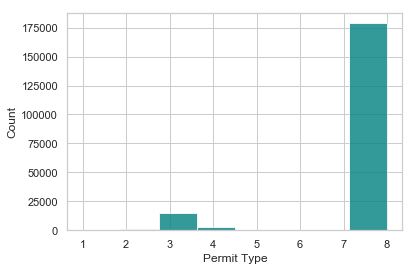

In [33]:
san_francisco_df['Permit Type'].mode()
ax = san_francisco_df['Permit Type'].hist(bins=8, color='teal', alpha=0.8)
ax.set(xlabel='Permit Type', ylabel='Count')
plt.show()

In [34]:
#replacing strings with numerical values

use_numbers, use_label = pd.factorize(san_francisco_df['Existing Use'])
san_francisco_df['Existing Use'] = use_numbers

neighborhood_numbers, neighboorhood_label = pd.factorize(san_francisco_df['Neighborhoods - Analysis Boundaries'])
san_francisco_df['Neighborhoods - Analysis Boundaries'] = neighborhood_numbers
san_francisco_df.head(10)

,Permit Number,Permit Type,Current Status,Number of Existing Stories,Revised Cost,Existing Use,Existing Units,Plansets,Existing Construction Type,Neighborhoods - Analysis Boundaries,...,Permit Creation Month,Issued Year,Issued Day,Issued Month,First Construction Document Year,First Construction Document Day,First Construction Document Month,Permit Expiration Year,Permit Expiration Day,Permit Expiration Month
0,201505065519,4,0,6.0,4000.0,0,143.0,2.0,3.0,0,...,5,2015.0,9.0,11.0,2015.0,9.0,11.0,2016.0,3.0,11.0
1,201604195146,4,1,7.0,500.0,0,1.0,2.0,3.0,0,...,4,2017.0,3.0,8.0,2017.0,3.0,8.0,2017.0,3.0,12.0
2,201605278609,3,0,6.0,20000.0,1,39.0,2.0,1.0,1,...,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,201611072166,8,1,2.0,2000.0,2,1.0,2.0,5.0,2,...,11,2017.0,18.0,7.0,2017.0,18.0,7.0,2018.0,13.0,7.0
4,201611283529,6,1,3.0,100000.0,1,1.0,2.0,3.0,0,...,11,2017.0,1.0,12.0,2017.0,20.0,11.0,2018.0,1.0,12.0
5,201706149344,8,1,5.0,4000.0,3,326.0,2.0,1.0,3,...,6,2017.0,6.0,7.0,2017.0,6.0,7.0,2018.0,1.0,7.0
6,201706300814,8,1,3.0,12000.0,3,5.0,0.0,5.0,4,...,6,2017.0,30.0,6.0,2017.0,30.0,6.0,2018.0,25.0,6.0
7,M803667,8,1,3.0,0.0,4,1.0,2.0,5.0,5,...,6,2017.0,30.0,6.0,2017.0,30.0,6.0,NaN,NaN,NaN
8,M804227,8,1,3.0,1.0,4,1.0,2.0,5.0,6,...,7,2017.0,5.0,7.0,2017.0,5.0,7.0,NaN,NaN,NaN
9,M804767,8,1,3.0,0.0,4,1.0,2.0,5.0,7,...,7,2017.0,6.0,7.0,2017.0,6.0,7.0,NaN,NaN,NaN


In [57]:
san_francisco_df.describe()

,Permit Type,Current Status,Number of Existing Stories,Revised Cost,Existing Use,Existing Units,Plansets,Existing Construction Type,Neighborhoods - Analysis Boundaries,Current Status Year,...,Permit Creation Month,Issued Year,Issued Day,Issued Month,First Construction Document Year,First Construction Document Day,First Construction Document Month,Permit Expiration Year,Permit Expiration Day,Permit Expiration Month
count,198900.000000,198900.000000,198900.000000,1.989000e+05,198900.000000,198900.000000,198900.000000,198900.000000,198900.000000,198900.000000,...,198900.000000,198900.000000,198900.000000,198900.000000,198900.000000,198900.000000,198900.000000,198900.000000,198900.000000,198900.000000
mean,7.522323,0.911860,5.177267,1.524857e+05,4.994319,12.605386,1.410709,4.251171,14.922242,2015.476868,...,6.456616,2015.314389,15.139341,6.707280,2015.318844,15.122695,6.715314,2016.767225,13.352423,5.831689
std,1.457451,0.283499,7.783629,3.653065e+06,6.101218,65.940787,20.198728,1.472049,8.884350,1.466925,...,3.412110,1.490686,8.598723,3.408254,1.491497,8.604930,3.411947,1.530728,8.455282,2.922848
min,1.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1.000000,0.000000,2013.000000,...,1.000000,2013.000000,1.000000,1.000000,2013.000000,1.000000,1.000000,2013.000000,1.000000,1.000000
25%,8.000000,1.000000,2.000000,1.000000e+00,2.000000,1.000000,0.000000,5.000000,9.000000,2014.000000,...,3.000000,2014.000000,8.000000,4.000000,2014.000000,8.000000,4.000000,2016.000000,7.000000,4.000000
50%,8.000000,1.000000,3.000000,7.500000e+03,4.000000,1.000000,2.000000,5.000000,14.000000,2016.000000,...,6.000000,2015.000000,14.000000,7.000000,2015.000000,14.000000,7.000000,2017.000000,10.000000,5.000000
75%,8.000000,1.000000,4.000000,3.000000e+04,5.000000,3.000000,2.000000,5.000000,20.000000,2017.000000,...,9.000000,2017.000000,22.000000,10.000000,2017.000000,22.000000,10.000000,2018.000000,20.000000,8.000000
max,8.000000,1.000000,78.000000,7.805000e+08,94.000000,1907.000000,9000.000000,5.000000,41.000000,2019.000000,...,12.000000,2018.000000,31.000000,12.000000,2018.000000,31.000000,12.000000,2024.000000,31.000000,12.000000


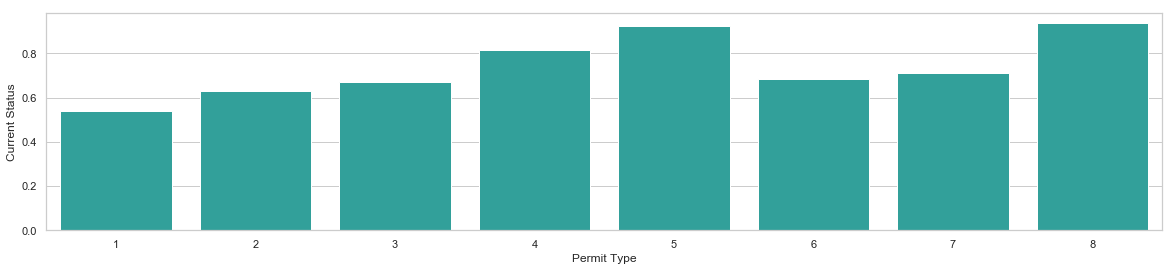

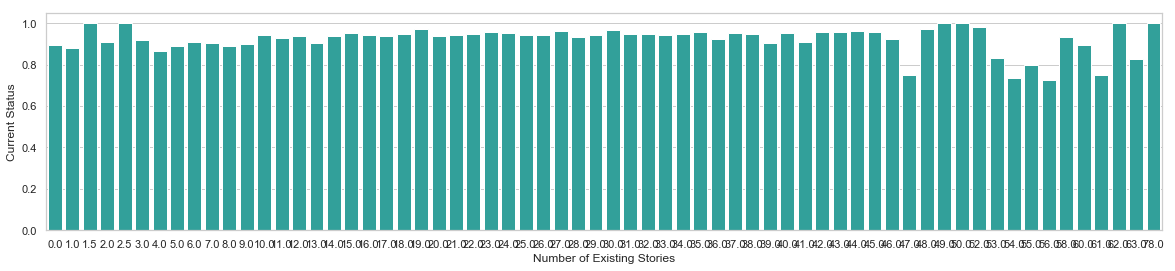

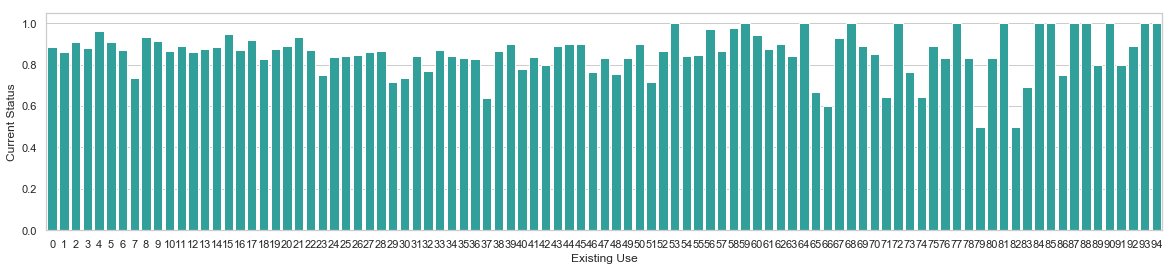

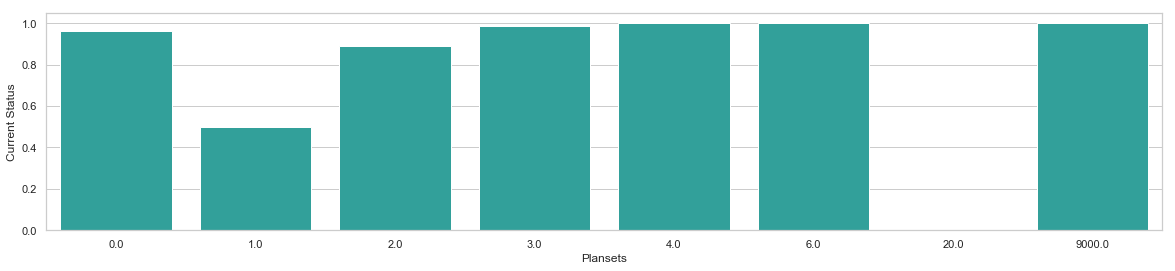

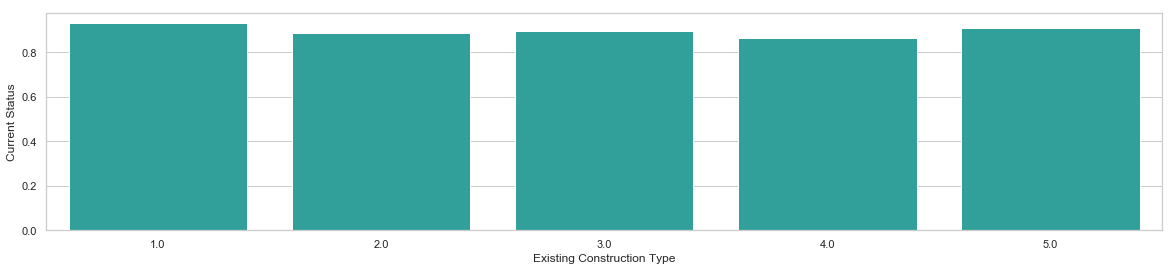

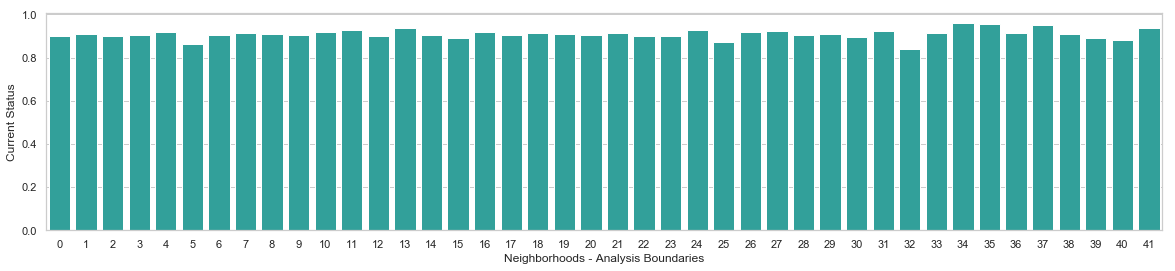

In [35]:
explore = ['Permit Type', 'Number of Existing Stories', 'Existing Use', 'Plansets', 'Existing Construction Type', 'Neighborhoods - Analysis Boundaries']
for i in range (0,len(explore)):
    plt.figure(figsize=(20,4))
    avg_status_by_permittype = san_francisco_df[[explore[i],'Current Status']].groupby(explore[i],as_index=False).mean()
    sns.barplot(x=explore[i], y='Current Status', data=avg_status_by_permittype, color="LightSeaGreen")
    plt.show()

In the plots above you can see:
Permit type 4(sign-erect), 5(grade or quarry or fill or excavate) and 8 (otc alterations, over the counter) are most likely to be permitted.
All permits with the values 4,6 and 9000 are permitted.
But all in all, there is no clear correlation between the permission of a building permit and the other columns.

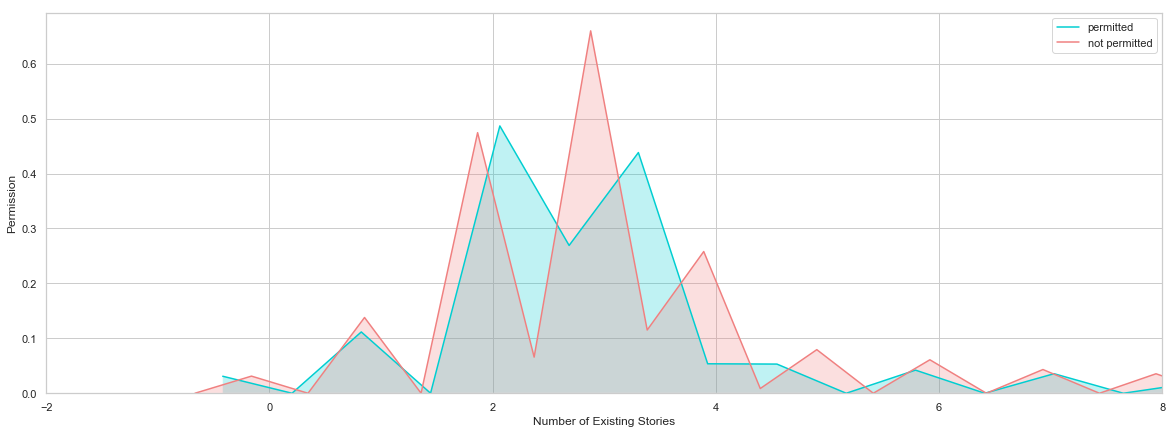

In [56]:
plt.figure(figsize=(20,7))
sns.kdeplot(san_francisco_df['Number of Existing Stories'][san_francisco_df['Current Status'] == 1], color="darkturquoise", shade=True)
sns.kdeplot(san_francisco_df['Number of Existing Stories'][san_francisco_df['Current Status'] == 0], color="lightcoral", shade=True)
plt.legend(['permitted', 'not permitted'])
plt.xlabel('Number of Existing Stories')
plt.ylabel('Permission')
plt.xlim(-2,8)
plt.show()

# C SF Permits Prediction
6 points

- Predict the "Current Status" or your substitute column from B from the other columns. 
- Drop unessecary columns 
- Construct one-hot encoded dummy columns 
- Choose the Predictor of your choice

In [58]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [37]:
#one hot encoding of the columns that consists of categories
sf_df = pd.get_dummies(san_francisco_df, columns=['Permit Type'])
sf_df2 = pd.get_dummies(sf_df, columns=['Existing Use'])
sf_df3 = pd.get_dummies(sf_df2, columns=['Existing Construction Type'])
sf_df_final = pd.get_dummies(sf_df3, columns=['Neighborhoods - Analysis Boundaries'])
sf_df_final.head()

,Permit Number,Current Status,Number of Existing Stories,Revised Cost,Existing Units,Plansets,Current Status Year,Current Status Day,Current Status Month,Filed Year,...,Neighborhoods - Analysis Boundaries_32,Neighborhoods - Analysis Boundaries_33,Neighborhoods - Analysis Boundaries_34,Neighborhoods - Analysis Boundaries_35,Neighborhoods - Analysis Boundaries_36,Neighborhoods - Analysis Boundaries_37,Neighborhoods - Analysis Boundaries_38,Neighborhoods - Analysis Boundaries_39,Neighborhoods - Analysis Boundaries_40,Neighborhoods - Analysis Boundaries_41
0,201505065519,0,6.0,4000.0,143.0,2.0,2017,21,12,2015,...,0,0,0,0,0,0,0,0,0,0
1,201604195146,1,7.0,500.0,1.0,2.0,2017,3,8,2016,...,0,0,0,0,0,0,0,0,0,0
2,201605278609,0,6.0,20000.0,39.0,2.0,2017,26,9,2016,...,0,0,0,0,0,0,0,0,0,0
3,201611072166,1,2.0,2000.0,1.0,2.0,2017,24,7,2016,...,0,0,0,0,0,0,0,0,0,0
4,201611283529,1,3.0,100000.0,1.0,2.0,2017,1,12,2016,...,0,0,0,0,0,0,0,0,0,0


In [52]:
import sklearn
from sklearn.model_selection import train_test_split


Y = san_francisco_df['Current Status']
X = san_francisco_df.drop(['Current Status', 'Permit Number'],axis=1)


X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X, Y, test_size = 0.2, random_state = 5)


from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
kbest = SelectKBest(f_regression, k=2)
arr = kbest.fit_transform(X_train, Y_train)
kbest_1 = SelectKBest(f_regression, k=1)
arr_1 = kbest_1.fit_transform(X_train, Y_train)

print("Most significant value (k=1)... {}".format(arr_1[0]))
print("Most significant values (k=2)... {}".format(arr[0]))



Most significant value (k=1)... [8.]
Most significant values (k=2)... [   8. 2017.]


# D SF Challenges
4 points 

Describe challenges you faced during A, B and C and how you solved it.